# Importing Libraries and Google Sheets API

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import gspread
import df2gspread as d2g
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('sheet_cred.json',scope)
gc = gspread.authorize(credentials)

In [2]:
plt.style.use('fivethirtyeight')

# Extracting Data from Yahoo Finance

In [3]:
df = web.DataReader('IVZINGOLD.NS', data_source='yahoo', start = '2012-04-01', end = '2022-10-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-02,2779.949951,2752.000000,2759.000000,2755.500000,2585.0,2755.500000
2012-04-03,2788.899902,2760.000000,2760.000000,2779.449951,1743.0,2779.449951
2012-04-04,2793.000000,2744.300049,2775.000000,2751.899902,71.0,2751.899902
2012-04-09,2774.500000,2745.000000,2745.000000,2766.600098,60.0,2766.600098
2012-04-10,2779.899902,2751.550049,2751.550049,2767.500000,27.0,2767.500000
...,...,...,...,...,...,...
2022-09-02,4530.000000,4514.000000,4530.000000,4528.799805,216.0,4528.799805
2022-09-05,4579.000000,4566.750000,4578.950195,4568.000000,15.0,4568.000000
2022-09-06,4570.000000,4526.000000,4564.250000,4546.799805,46.0,4546.799805


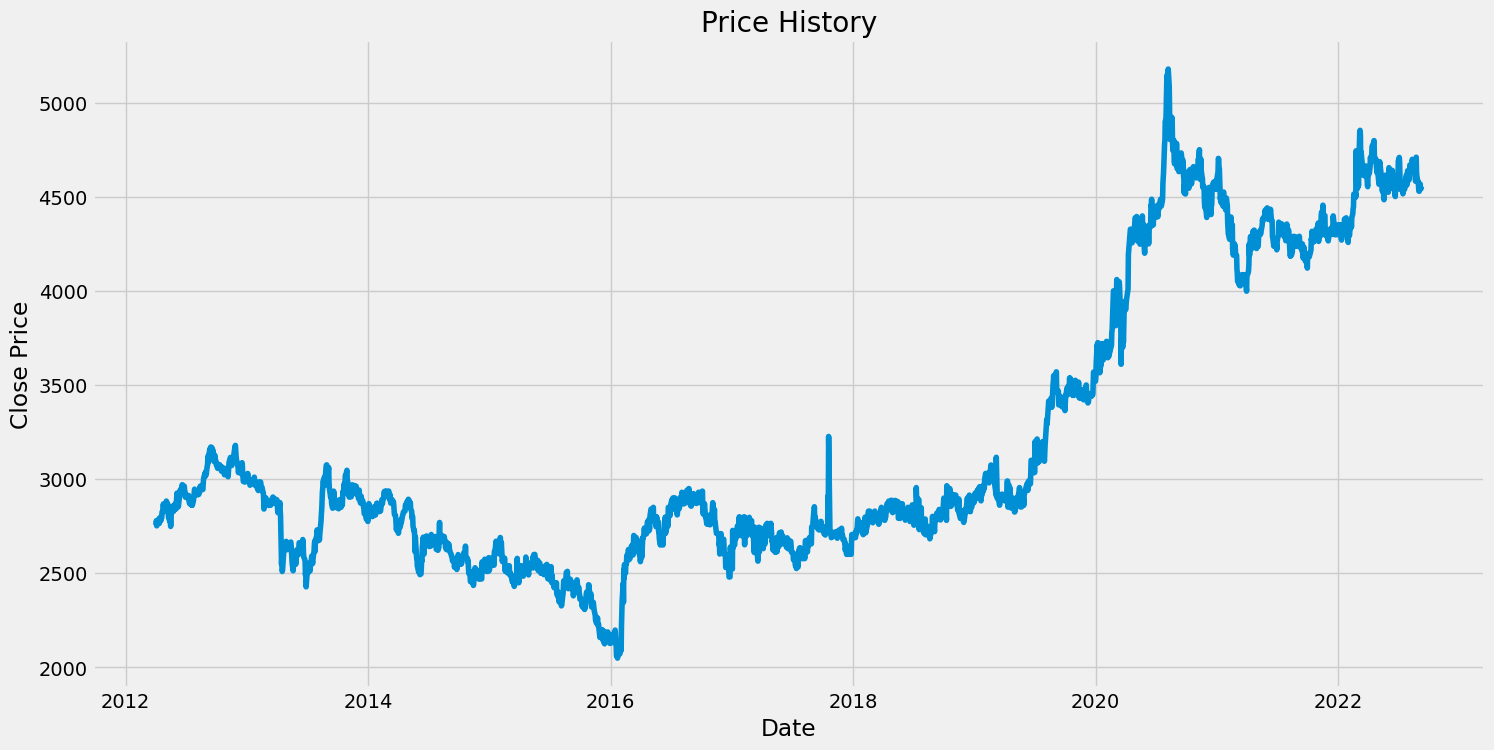

In [4]:
plt.figure(figsize = (16,8))
plt.title('Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [5]:
data = df.filter(['Close'])
data

,Close
Date,
2012-04-02,2755.500000
2012-04-03,2779.449951
2012-04-04,2751.899902
2012-04-09,2766.600098
2012-04-10,2767.500000
...,...
2022-09-02,4528.799805
2022-09-05,4568.000000
2022-09-06,4546.799805


In [6]:
dataset = data.values
dataset

array([[2755.5       ],
       [2779.44995117],
       [2751.89990234],
       ...,
       [4546.79980469],
       [4541.29980469],
       [4555.        ]])

# Creating training data

In [7]:
training_data_len = len(dataset) - 60
training_data_len

2513

# Scaling the data

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.58397799],
       [-0.55198619],
       [-0.58878692],
       ...,
       [ 1.80879945],
       [ 1.80145268],
       [ 1.81975309]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []
for i in range(60,len(train_data)):
    X_train.append(train_data[i-60 : i, 0])
    y_train.append(train_data[i, 0])

In [10]:
X_train

[array([-0.58397799, -0.55198619, -0.58878692, -0.56915073, -0.56794867,
        -0.53742603, -0.57048651, -0.54243519, -0.52593854, -0.54991567,
        -0.53074714, -0.53255057, -0.49040673, -0.4837947 , -0.43370306,
        -0.48800227, -0.46449279, -0.45881573, -0.44432242, -0.43764353,
        -0.41306536, -0.42288313, -0.43210019, -0.45868202, -0.51451758,
        -0.53428715, -0.54003105, -0.56046818, -0.55312141, -0.59319472,
        -0.55939982, -0.49074068, -0.45273788, -0.47097111, -0.44706083,
        -0.4482629 , -0.48559813, -0.4378441 , -0.44158401, -0.45721287,
        -0.42942863, -0.46916801, -0.35662878, -0.3670479 , -0.36103691,
        -0.39082448, -0.45373971, -0.39783731, -0.37539651, -0.35015013,
        -0.33185004, -0.33746024, -0.33298559, -0.30413267, -0.29698613,
        -0.33011347, -0.35168647, -0.33338606, -0.30740526, -0.3375271 ]),
 array([-0.55198619, -0.58878692, -0.56915073, -0.56794867, -0.53742603,
        -0.57048651, -0.54243519, -0.52593854, -0

In [11]:
y_train

[-0.3454749068275788,
 -0.3842124457374761,
 -0.3705207293986331,
 -0.3864832017604221,
 -0.389822644769896,
 -0.37686567111663355,
 -0.3893553184190585,
 -0.373259137889898,
 -0.3971694193907386,
 -0.42428576185116296,
 -0.4307644117365349,
 -0.4339032924949516,
 -0.42702417034242784,
 -0.4249536504530578,
 -0.4430534967879026,
 -0.43584043033443154,
 -0.44285326065432673,
 -0.4176737299159009,
 -0.4033141249751631,
 -0.37780064993578993,
 -0.34600941337958346,
 -0.32864430973031916,
 -0.36804973724211126,
 -0.344205983707475,
 -0.35288853553210714,
 -0.3593671854174791,
 -0.3509517238101086,
 -0.36898471606126765,
 -0.36658025187095017,
 -0.3588995329491602,
 -0.3641757876806327,
 -0.3555600899396863,
 -0.3074052565195763,
 -0.3375270976885272,
 -0.33331952994358266,
 -0.32416932565063156,
 -0.33138239210410264,
 -0.29658565683936966,
 -0.25738046546115345,
 -0.2453584706270474,
 -0.22024579397230737,
 -0.23654221063504374,
 -0.20608675128262685,
 -0.22972994256620582,
 -0.2263904995

In [12]:
X_train , y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2453, 60, 1)

# Creating LSTM model

In [14]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

# Cross Validation

In [16]:
model.fit(X_train, y_train, batch_size= 15, epochs = 15)

Epoch 1/15
164/164 [==============================] - 9s 37ms/step - loss: 0.0295
Epoch 2/15
164/164 [==============================] - 6s 39ms/step - loss: 0.0085
Epoch 3/15
164/164 [==============================] - 6s 38ms/step - loss: 0.0070
Epoch 4/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0059
Epoch 5/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0055
Epoch 6/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0058
Epoch 7/15
164/164 [==============================] - 6s 36ms/step - loss: 0.0051
Epoch 8/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0048
Epoch 9/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0047
Epoch 10/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0043
Epoch 11/15
164/164 [==============================] - 6s 37ms/step - loss: 0.0041
Epoch 12/15
164/164 [==============================] - 6s 36ms/step - loss: 0.0041
Epoch 13/15
1

# Creating test data

In [17]:
test_data = scaled_data[training_data_len - 60:, :]
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [18]:
X_test = np.array(X_test)


In [19]:
X_test.shape

(60, 60)

In [20]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 20ms/step


In [22]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

3.055069986979167

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid.loc[:,'Predictions'] = predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_12364\1595871640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.loc[:,'Predictions'] = predictions


# Creating predicted and actual values DataFrame

In [24]:
valid

,Close,Predictions
Date,,
2022-06-14,4544.700195,4615.397461
2022-06-15,4554.899902,4568.474609
2022-06-16,4568.399902,4552.894531
2022-06-17,4614.950195,4557.749512
2022-06-20,4531.750000,4592.645996
2022-06-21,4530.750000,4552.744141
2022-06-22,4501.049805,4532.758789
2022-06-23,4580.000000,4506.431641
2022-06-24,4588.750000,4549.521484


In [25]:
len(df)

2573

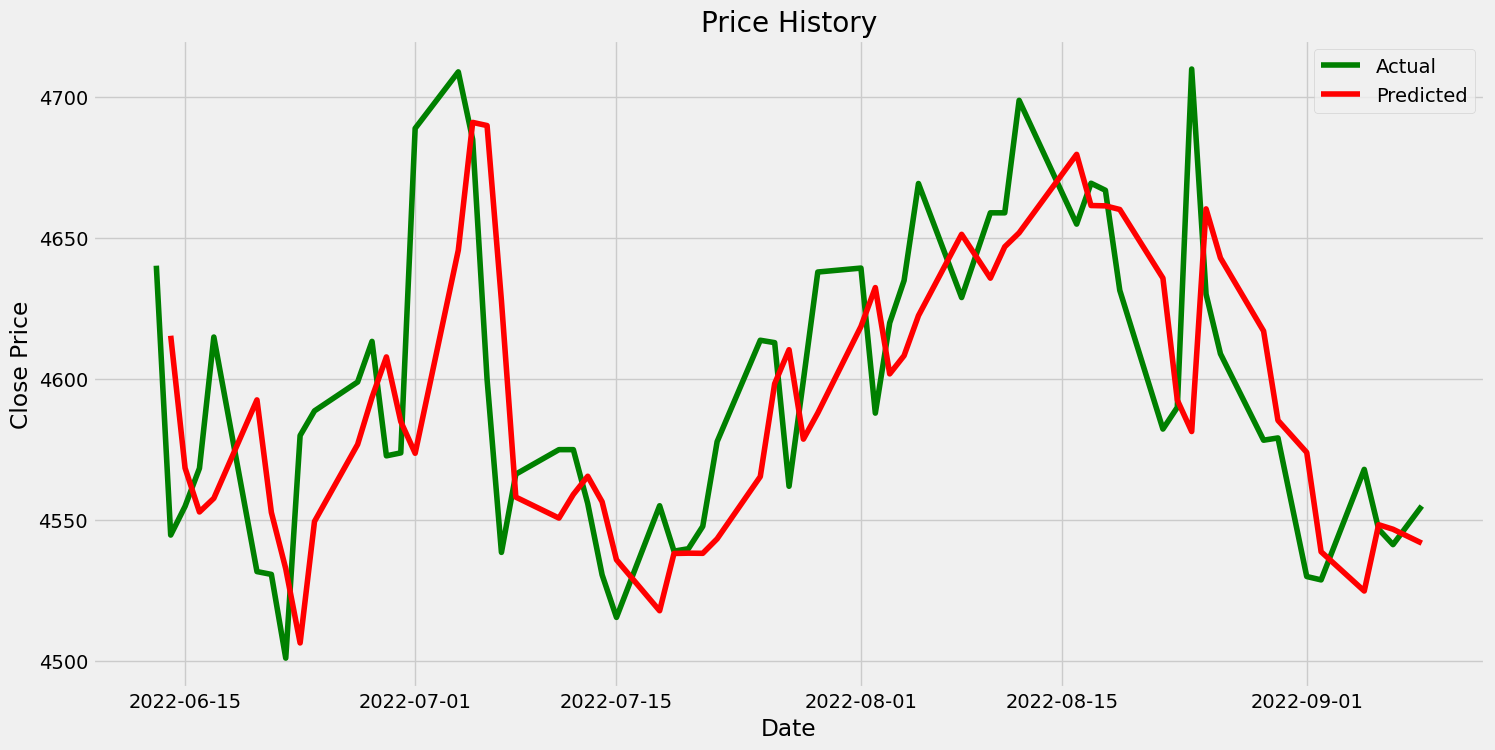

In [26]:
plt.figure(figsize = (16,8))
plt.title('Price History')
plt.plot(df.loc['2022-6-11':,'Close'],color= 'g')
plt.plot(valid['Predictions'], color = 'r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(["Actual", "Predicted"])
plt.show()

# Google Sheet API

In [27]:
spreadsheet_key = '1hgH68VJuNU2o73rC18NYjqMuZ3ISuPhF45FENysYMjE'
wks_name = 'Master'
sh = gc.open_by_key(spreadsheet_key)

In [28]:
worksheet_list = sh.worksheets()
worksheet_list

[<Worksheet 'ICICI Prudential Gold ETF' id:1631294679>,
 <Worksheet 'HDFC GOLD ETF' id:752866263>,
 <Worksheet 'AXIS GOLD ETF' id:1042307528>,
 <Worksheet 'IDBI GOLD ETF' id:1854748226>,
 <Worksheet 'INVESCO INDIA GOLD ETF' id:636304532>,
 <Worksheet 'Rough Work' id:749992226>,
 <Worksheet 'Predicted Values' id:1745246579>,
 <Worksheet 'Sheet23' id:1279113395>]

# Writing Data to Google Sheets

In [29]:
for i in range(1,61):
    a = 'N' + str(i+2)
    worksheet_list[6].update_acell(a, valid.iloc[i-1,0])

In [30]:
x = valid.index
x

DatetimeIndex(['2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17',
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11',
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-08',
               '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-16',
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-09-01', '2022-09-02',
      

In [33]:
for i in range(1,61):
    a = 'M' + str(i+2)
    worksheet_list[6].update_acell(a,str(x[i-1]))

In [34]:
for i in range(0,60):
    a = 'O' + str(i+3)
    worksheet_list[6].update_acell(a, float(predictions[i]))

# Writing Data to CSV file

In [35]:
valid.to_csv("C:/Users/hp/Invesco_gold_pred.csv")